This file has the code to visualise syllable transition values and create a graph based on it

Date: 20/9/2022

In [1]:
import math
import pandas
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from networkx.drawing.nx_pydot import write_dot

In [2]:
#set directory
os.chdir('D:\\4th Year\\Semester 7\\BI4313 Sem Project\\IN-comparative-analysis\\IN-comparative-analysis')

In [35]:
file = pandas.read_csv('JF1_transition_probability.csv', header=None)
trans_prob_matrix = file.to_numpy(copy=True)

#Drop the row and column labels, just keep the numeric values
trans_prob = file.iloc[1:, 1:]
trans_prob = np.array(trans_prob)
trans_prob = trans_prob.astype(float)

print(len(trans_prob))

#Get the set of unique syllables for the individual with their own index (so convert array to list)
uniq_syl = trans_prob_matrix[:1, 1:]
#uniq_syl = np.array(uniq_syl)

print(uniq_syl)
print(len(uniq_syl))
print(trans_prob_matrix)

11
[['Start' 'k' 'i' 'a' 'j' 'f' 'd' 'b' 'e' 'c' 'End']]
1
[['0' 'Start' 'k' 'i' 'a' 'j' 'f' 'd' 'b' 'e' 'c' 'End']
 ['Start' '0' '0.44' '0.44' '0' '0' '0' '0' '0.11' '0' '0' '0']
 ['k' '0' '0.23' '0.31' '0.08' '0' '0' '0' '0.15' '0' '0' '0.15']
 ['i' '0' '0' '0.41' '0.11' '0.17' '0.15' '0.14' '0' '0' '0' '0']
 ['a' '0' '0' '0.33' '0.05' '0.62' '0' '0' '0' '0' '0' '0']
 ['j' '0' '0' '0.33' '0.08' '0.42' '0.06' '0.08' '0' '0' '0' '0']
 ['f' '0' '0' '0' '0' '0' '0' '0.97' '0' '0' '0' '0']
 ['d' '0' '0.05' '0.08' '0' '0.26' '0' '0.24' '0.26' '0' '0' '0.07']
 ['b' '0' '0' '0.07' '0' '0' '0.27' '0' '0.39' '0.25' '0' '0']
 ['e' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0']
 ['c' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0']
 ['End' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']]


In [40]:
from operator import index


file = pandas.read_csv('JF1_transition_probability.csv', header=list, index_col=list)

x = file.columns.to_numpy()
x

ValueError: header must be integer or list of integers

In [48]:
trans_prob_matrix = file.loc[:, :].values
trans_prob_matrix = trans_prob_matrix.tolist()
tp = np.array(trans_prob_matrix)
print(trans_prob_matrix)
print(tp[:1, 1:])
print(len(tp[:1, 1:]))

[['0', 'Start', 'k', 'i', 'a', 'j', 'f', 'd', 'b', 'e', 'c', 'End'], ['Start', '0', '0.44', '0.44', '0', '0', '0', '0', '0.11', '0', '0', '0'], ['k', '0', '0.23', '0.31', '0.08', '0', '0', '0', '0.15', '0', '0', '0.15'], ['i', '0', '0', '0.41', '0.11', '0.17', '0.15', '0.14', '0', '0', '0', '0'], ['a', '0', '0', '0.33', '0.05', '0.62', '0', '0', '0', '0', '0', '0'], ['j', '0', '0', '0.33', '0.08', '0.42', '0.06', '0.08', '0', '0', '0', '0'], ['f', '0', '0', '0', '0', '0', '0', '0.97', '0', '0', '0', '0'], ['d', '0', '0.05', '0.08', '0', '0.26', '0', '0.24', '0.26', '0', '0', '0.07'], ['b', '0', '0', '0.07', '0', '0', '0.27', '0', '0.39', '0.25', '0', '0'], ['e', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0'], ['c', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0'], ['End', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']]
[['Start' 'k' 'i' 'a' 'j' 'f' 'd' 'b' 'e' 'c' 'End']]
1


In [32]:
unisyl = file.iloc[:1, 1:]
unisyl = np.array(unisyl)
unisyl
#len(unisyl)
#print(unisyl)
#print(len(unisyl))

array([['Start', 'k', 'i', 'a', 'j', 'f', 'd', 'b', 'e', 'c', 'End']],
      dtype=object)

In [15]:
tp = file.to_numpy()

tp[:1, 1:]
print(tp)
len(tp)

[['0' 'Start' 'k' 'i' 'a' 'j' 'f' 'd' 'b' 'e' 'c' 'End']
 ['Start' '0' '0.44' '0.44' '0' '0' '0' '0' '0.11' '0' '0' '0']
 ['k' '0' '0.23' '0.31' '0.08' '0' '0' '0' '0.15' '0' '0' '0.15']
 ['i' '0' '0' '0.41' '0.11' '0.17' '0.15' '0.14' '0' '0' '0' '0']
 ['a' '0' '0' '0.33' '0.05' '0.62' '0' '0' '0' '0' '0' '0']
 ['j' '0' '0' '0.33' '0.08' '0.42' '0.06' '0.08' '0' '0' '0' '0']
 ['f' '0' '0' '0' '0' '0' '0' '0.97' '0' '0' '0' '0']
 ['d' '0' '0.05' '0.08' '0' '0.26' '0' '0.24' '0.26' '0' '0' '0.07']
 ['b' '0' '0' '0.07' '0' '0' '0.27' '0' '0.39' '0.25' '0' '0']
 ['e' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0']
 ['c' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0']
 ['End' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']]


12

In [33]:
states1 = tuple([tuple(e) for e in uniq_syl])
#uniq_syl_start.tolist()
states2 = tuple([tuple(e) for e in uniq_syl])
print(states2)
Q = trans_prob

(('Start', 'k', 'i', 'a', 'j', 'f', 'd', 'b', 'e', 'c', 'End'),)


In [18]:
#weights matrix
Q = trans_prob

#For BCC M09
#states = (('Start'), ('i'), ('a'), ('b'), ('c'), ('d'), ('e'), ('f'), ('g'), ('h'), ('m'), ('End'), ('n'), ('p'), ('q'), ('r'), ('s'), ('k'), ('l'))

#For BCC M01
#states = (('Start'), ('i'), ('j'), ('a'), ('b'), ('c'), ('d'), ('e'), ('f'), ('g'), ('h'), ('p'), ('q'), ('r'), ('End'), ('k'), ('l'), ('m'), ('o'))

#For JF1
states = (('Start'), ('k'), ('i'), ('a'), ('j'), ('f'), ('d'), ('b'), ('e'), ('c'), ('End'))

In [19]:
G = nx.MultiDiGraph()
labels={}
edge_labels={}

for i, origin_state in enumerate(states):
    for j, destination_state in enumerate(states):
        rate = Q[i][j]
        if rate > 0:
            G.add_edge(origin_state,
                       destination_state,
                       weight=rate,
                       label=rate)
            edge_labels[(origin_state, destination_state)] = label = "{:.02f}".format(rate)

In [20]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.25]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.25]

pos = nx.spring_layout(G, seed=7)

In [9]:
fixed_positions = {'Start', 'End'}
fixed_positions = {Start:(0,0), End:(0,0)}
fixed_nodes = fixed_positions.keys()

NameError: name 'Start' is not defined

In [12]:
fixed_nodes = ['Start', 'End']

pos = nx.spring_layout(G, fixed=fixed_nodes)

ValueError: too many values to unpack (expected 2)

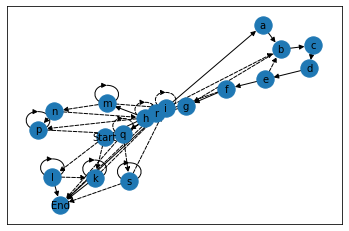

In [22]:

# nodes
nx.draw_networkx_nodes(G, pos, node_size=300)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()


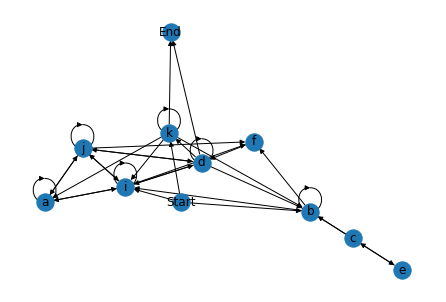

In [29]:
nx.draw(G, with_labels=True)

plt.savefig('JF1_nx_temp2.png')

TypeError: cannot perform reduce with flexible type

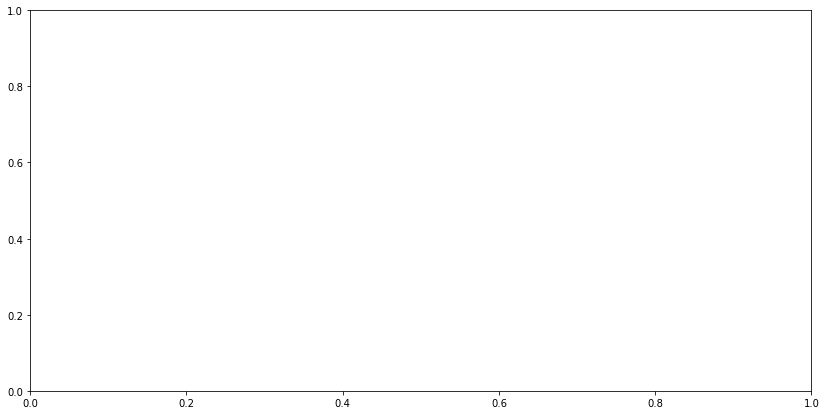

In [63]:
plt.figure(figsize=(14,7))
node_size = 20
pos = {state:list(state) for state in states5}
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_weight=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.axis('off')